In [474]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from matplotlib.ticker import MaxNLocator
# from scipy.spatial import ConvexHull


In [476]:
# for testing
mcfiles = ['../dsa_mc/testing_up.npy']
# mcfiles = ['../dsa_mc/roots_95_test/roots_95.npy']

# for different center of mass energies
# rs_arr = ['55', '95', '135']
# mcfiles = [f'../dsa_mc/mc_data/roots_{rs}/roots_{rs}_240k.npy' for rs in rs_arr]

# for different replicas
# mcfiles = [
#     f'../dsa_mc/roots_95/roots_95_100k.npy',
#     f'../dsa_mc/roots_95_trial2/roots_95_100k_trial2.npy',
#     f'../dsa_mc/roots_95_trial3/roots_95_100k_trial3.npy'
#           ]

columns = ['s', 'Q', 'x', 'delta', 'pT', 'z', 'y']
columns += ['numerator', 'cos(phi_kp)', 'cos(phi_Dp)', 'cos(phi_Dp)cos(phi_kp)', 'sin(phi_Dp)sin(phi_kp)', 'denominator']
columns += ['<1>', '<cos(phi_kp)>', '<cos(phi_Dp)>', '<cos(phi_Dp)cos(phi_kp)>', '<sin(phi_Dp)sin(phi_kp)>']

mc_dfs = []
for ifile, mcfile in enumerate(mcfiles):
    mcdata = np.load(mcfile)
    mc_df = pd.DataFrame(mcdata, columns=columns)
    mc_df['t'] = mc_df['delta']**2
    mc_dfs.append(mc_df)


In [478]:
mc_dfs[0].tail()

,s,Q,x,delta,pT,z,y,numerator,cos(phi_kp),cos(phi_Dp),cos(phi_Dp)cos(phi_kp),sin(phi_Dp)sin(phi_kp),denominator,<1>,<cos(phi_kp)>,<cos(phi_Dp)>,<cos(phi_Dp)cos(phi_kp)>,<sin(phi_Dp)sin(phi_kp)>,t
9995,21025.0,7.811806,0.006828,0.176153,4.755724,0.345137,0.425062,27.960507,-1.034106,0.974956,-0.748281,0.181773,5103.100662,0.005479,-0.000203,0.000191,-0.000147,0.000036,0.031030
9996,21025.0,6.309478,0.002206,0.230923,2.766000,0.472399,0.858244,78.301372,-0.809354,1.126278,-2.594230,1.221845,13584.490395,0.005764,-0.000060,0.000083,-0.000191,0.000090,0.053325
9997,21025.0,7.015796,0.003040,0.137521,2.494976,0.326365,0.769973,87.323717,-6.650318,4.568030,-1.446093,1.110873,13455.142717,0.006490,-0.000494,0.000340,-0.000107,0.000083,0.018912
9998,21025.0,6.276912,0.003547,0.189592,6.599419,0.490584,0.528303,13.499876,0.011989,0.011943,-0.134862,-0.026114,2351.728413,0.005740,0.000005,0.000005,-0.000057,-0.000011,0.035945
9999,21025.0,6.845306,0.003044,0.211787,7.414391,0.316794,0.732056,11.295308,0.129136,0.131885,-0.035175,-0.029033,997.192301,0.011327,0.000129,0.000132,-0.000035,-0.000029,0.044854


In [480]:
# function to plot histograms

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12  
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'

def plot_histogram(datasets, df, corrs, constraints={}, **options):

    asp_ratio = 4/3
    psize = 5

    fig, ax = plt.subplots(1, 1, figsize=(asp_ratio*psize, psize))
        
    colors = ['black', 'red', 'blue', 'green', 'gray', 'orange', 'pink']
    linestyles = ['-', '-', '-', '-', '-', '-', '-']

    lumis = [data['lumi'] for data in datasets]
    if len(set(lumis)) == 1: same_lumi = True
    else: same_lumi = False

    for idata, data in enumerate(datasets):
        for ic, corr in enumerate(corrs):

            no_label = False
            if len(datasets) > 1:
                if len(corrs) > 1: raise ValueError('Should not plot multiple correlations with multiple datasets')
                label = options.get('labels')[idata]
                ilab = idata
            
            elif len(corrs) > 1:
                label = options.get('labels')[ic]
                ilab = ic
                    
            else:
                ilab = 0
                label = None


            if options.get('plot_ratio', True):
                
                ax.errorbar(
                    data[corr]['bin centers'], data[corr]['dsa counts'], yerr=data[corr]['dsa errors'],
                    fmt=options.get('fmt', 'o'), 
                    capsize=3, elinewidth=0.8, capthick=0.5, color=colors[ilab],
                    label=label
                )
                ax.step(data[corr]['bin centers'], data[corr]['dsa counts'], where='mid', linestyle=linestyles[ilab], color=colors[ilab], linewidth=1)

            else:

                ax.errorbar(
                    data[corr]['bin centers'], data[corr]['numerator counts'], yerr=data[corr]['numerator errors'],
                    fmt=options.get('fmt', 'o'), 
                    capsize=3, elinewidth=0.8, capthick=0.5, color='red',
                    label='Numerator'
                )
                ax.step(data[corr]['bin centers'], data[corr]['numerator counts'], where='mid', linestyle=linestyles[ilab], color='red', linewidth=1)

                ax.errorbar(
                    data[corr]['bin centers'], data[corr]['denominator counts'], yerr=data[corr]['denominator errors'],
                    fmt=options.get('fmt', 'o'), 
                    capsize=3, elinewidth=0.8, capthick=0.5, color='black',
                    label='Denominator'
                )
                ax.step(data[corr]['bin centers'], data[corr]['denominator counts'], where='mid', linestyle=linestyles[ilab], color='black', linewidth=1)


        # make info box for kinematics
        if same_lumi:
            info_text = fr'Integrated luminosity: ${lumis[0]}\,\, \mathrm{{fb}}^{{-1}}$' + '\n'
        else:
            info_text = ''
            
        if options.get('roots_label'):
            info_text += fr'$\sqrt{{s}} = {round(np.sqrt(df.iloc[0]['s']))}\,\, \mathrm{{GeV}}$' + '\n'
        else: 
            pass
        # info_text += '\nCuts:'

        for var in ['Q', 'y', 't', 'z']:
            low = df[var].min()
            high = df[var].max()
            
            if var == 'Q':
                info_text += fr'${var}^2 \, \in \,[{round(low**2,1)}, \, {round(high**2,1)}]\, \mathrm{{GeV^2}}$' + '\n'
            elif var == 't':
                info_text += fr'${var} \, \in \,  [{round(low,2)}, \, {round(high,2)}]\, \mathrm{{GeV}}^2$' + '\n'
            elif var == 'y':
                info_text += fr'${var} \, \in \, [{round(low,3)}, \, {round(high,3)}]$' + '\n'
            elif var == 'z':
                info_text += fr'${var} \, \in \, [{round(low,2)}, \, {round(high,2)}]$'

        if options.get('info_box'):
            ax.text(
                0.05, 0.05, info_text, 
                transform=ax.transAxes, 
                ha='left', va='bottom', 
                fontsize=11, wrap=True, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.3, edgecolor='none')
            )

        if len(corrs) > 1 or len(datasets) > 1: ax.legend(frameon=False)

        # set plot info
        if options.get('y_limits'): ax.set_ylim(options.get('y_limits'))
        # ax.set_xlim(options.get('x_limits', [plot_bins[0], plot_bins[-1]]))
        ax.set_title(options.get('title', ''))
        ax.set_ylabel(options.get('y_label', ''), loc='top')
        ax.set_xlabel(options.get('x_label', ''), loc='right')
        ax.set_yscale(options.get('y_scale', 'linear'))
        ax.set_xscale(options.get('x_scale', 'linear'))
        # ax.tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
        ax.tick_params(which='both', direction="in", length=5, width=1)
        ax.grid(options.get('grid', False)) 
        ax.xaxis.set_major_locator(MaxNLocator(nbins=15))
        if options.get('zero_line', False): ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
        if options.get('one_line', False): ax.axhline(y=1, color='gray', linestyle='--', linewidth=1)
        if options.get('min_pT_line', False) and plot_var == 'pT': 
            ax.axvline(x=1, color='gray', linestyle='--')
            ax.fill_betweenx(ax.get_ylim(), ax.get_xlim()[0], 1, color='gray', alpha=0.25)
        plt.tight_layout()
        if options.get('saveas'): 
            if 'DNS' in options.get('saveas'): 
                pass
            else:
                fig.savefig(options.get('saveas'), dpi=400, bbox_inches="tight")



def cut_data(df, var, constraints={}, **options):

    lumi = options.get('lumi', 10) # total integrated luminosity in fb^-1
    lumi *= options.get('efficiency', 1) # correct for detector efficiency
        
    # get bins
    bins = options.get('bins')
    nbins = len(bins)
    bin_width = bins[1] - bins[0]
    bin_centers = 0.5*(bins[:-1]+bins[1:])

    # enforce constraints
    mask = pd.Series(True, index=df.index)
    for ivar, (low, high) in constraints.items(): mask &= df[ivar].between(low, high)
    fixed_df = df[mask]

    if fixed_df.empty:
        print('Error: cut data is empty - constraints are too strict')
        return

    # get phase space volume

    r02 = 4 # oscillation cut-off (fixme: include in data)
    tmin = fixed_df['t'].min()
    tmax = fixed_df['t'].max()
    zmin = fixed_df['z'].min()
    zmax = fixed_df['z'].max()
    ymax = fixed_df['y'].max()


    print(zmin , zmax)
    phase_space_volume = 0.01*0.5*fixed_df.iloc[0]['s']*(zmax - zmin)*(ymax**2)
    phase_space_volume -= r02*ymax*np.log((zmax*(1-zmin))/(zmin*(1-zmax)))
    phase_space_volume += ((r02**2)/(2*0.01*fixed_df.iloc[0]['s']))*((2*zmax - 1)/(zmax*(1-zmax)))
    phase_space_volume -= ((r02**2)/(2*0.01*fixed_df.iloc[0]['s']))*((2*zmin - 1)/(zmin*(1-zmin)))
    phase_space_volume += ((r02**2)/(2*0.01*fixed_df.iloc[0]['s']))*2*np.log((zmax*(1-zmin))/(zmin*(1-zmax)))
    phase_space_volume *= tmax - tmin

    print(phase_space_volume)

    # phase_space_volume = 1
    # for jvar in ['Q', 't', 'y', 'z']: 
    #     if jvar == var: 
    #         var_volume
    #         continue

    #     var_min = fixed_df[jvar].min()
    #     var_max = fixed_df[jvar].max()

    #     if jvar == 'Q':
    #         var_min *= var_min 
    #         var_max *= var_max

    #     phase_space_volume *= var_max - var_min

    # phase_space_volume *= 0.5 # from Q^2 - y plane

    print(phase_space_volume)
    
    nevents = fixed_df.shape[0]

    print(nevents)
        
    # make plot data 
    cut_data = {}
    correlations = ['1', 'cos(phi_kp)', 'cos(phi_Dp)', 'cos(phi_Dp)cos(phi_kp)', 'sin(phi_Dp)sin(phi_kp)']
    correlations += ['<1>', '<cos(phi_kp)>', '<cos(phi_Dp)>', '<cos(phi_Dp)cos(phi_kp)>', '<sin(phi_Dp)sin(phi_kp)>']
    for ic, corr in enumerate(correlations):

        if corr == '1': weight = 'numerator'
        else: weight = corr

        denominator_counts, _ = np.histogram(fixed_df[var], bins=bins, weights=fixed_df['denominator'])
        numerator_counts, _ = np.histogram(fixed_df[var], bins=bins, weights=fixed_df[weight])
        
        nentries, _ = np.histogram(fixed_df[var], bins=bins)
        print('Entries per bin:', nentries)

        # denominator_counts = np.array(denominator_counts)*(phase_space_volume/nevents)*(15.0/(bin_width))
        # numerator_counts = np.array(numerator_counts)*(phase_space_volume/nevents)*(15.0/(bin_width))

        denominator_counts = np.array(denominator_counts)*(phase_space_volume/nentries)
        numerator_counts = np.array(numerator_counts)*(phase_space_volume/nentries)

        # print(corr, numerator_counts)

        if '<' not in corr: 
            dsa_counts = np.array([inum/iden if iden != 0 else 0 for inum, iden in zip(numerator_counts, denominator_counts)])
        else:
            dsa_counts = numerator_counts

        # for ibin, iden in zip(bin_centers, denominator_counts):
        #     print(ibin, iden)

        # return 

        # errors are calculated for a given integrated luminosity (5% systematic error added per 1505.05783 NOT ANYMORE)
        stat_error_num = np.sqrt(denominator_counts/lumi)
        stat_error_denom = np.sqrt(denominator_counts/lumi)

        if corr == '1': weight_factor = 1
        elif corr in ['cos(phi_kp)', 'cos(phi_Dp)']: weight_factor = 0.5
        elif corr in ['cos(phi_Dp)cos(phi_kp)', 'sin(phi_Dp)sin(phi_kp)']: weight_factor = 0.25
            
        stat_error_dsa = np.array([np.sqrt((weight_factor+(ic**2))/(lumi*tc)) if tc != 0 else 0 for ic, tc in zip(dsa_counts, denominator_counts)])

        # print(corr, 'err', stat_error_dsa)
        # print(corr, 'err', stat_error_denom)

        
        cut_data[corr] = {}
    
        cut_data[corr]['bin centers'] = bin_centers
        cut_data[corr]['denominator counts'] = denominator_counts
        cut_data[corr]['denominator errors'] = stat_error_denom
        cut_data[corr]['numerator counts'] = numerator_counts
        cut_data[corr]['numerator errors'] = stat_error_num
        cut_data[corr]['dsa counts'] = dsa_counts
        cut_data[corr]['dsa errors'] = stat_error_dsa
        
    cut_data['lumi'] = lumi
    return cut_data, fixed_df



0.20013456508461358 0.49992425163847215
1.4042917035134785
1.4042917035134785
10000
Entries per bin: [ 99 297 358 359 348 386 368 362 379 345 332 350 362 333 354 342 358 333
 362 318 370 389 351 387 334 331 388 343 357]
Entries per bin: [ 99 297 358 359 348 386 368 362 379 345 332 350 362 333 354 342 358 333
 362 318 370 389 351 387 334 331 388 343 357]
Entries per bin: [ 99 297 358 359 348 386 368 362 379 345 332 350 362 333 354 342 358 333
 362 318 370 389 351 387 334 331 388 343 357]
Entries per bin: [ 99 297 358 359 348 386 368 362 379 345 332 350 362 333 354 342 358 333
 362 318 370 389 351 387 334 331 388 343 357]
Entries per bin: [ 99 297 358 359 348 386 368 362 379 345 332 350 362 333 354 342 358 333
 362 318 370 389 351 387 334 331 388 343 357]
Entries per bin: [ 99 297 358 359 348 386 368 362 379 345 332 350 362 333 354 342 358 333
 362 318 370 389 351 387 334 331 388 343 357]
Entries per bin: [ 99 297 358 359 348 386 368 362 379 345 332 350 362 333 354 342 358 333
 362 318 3

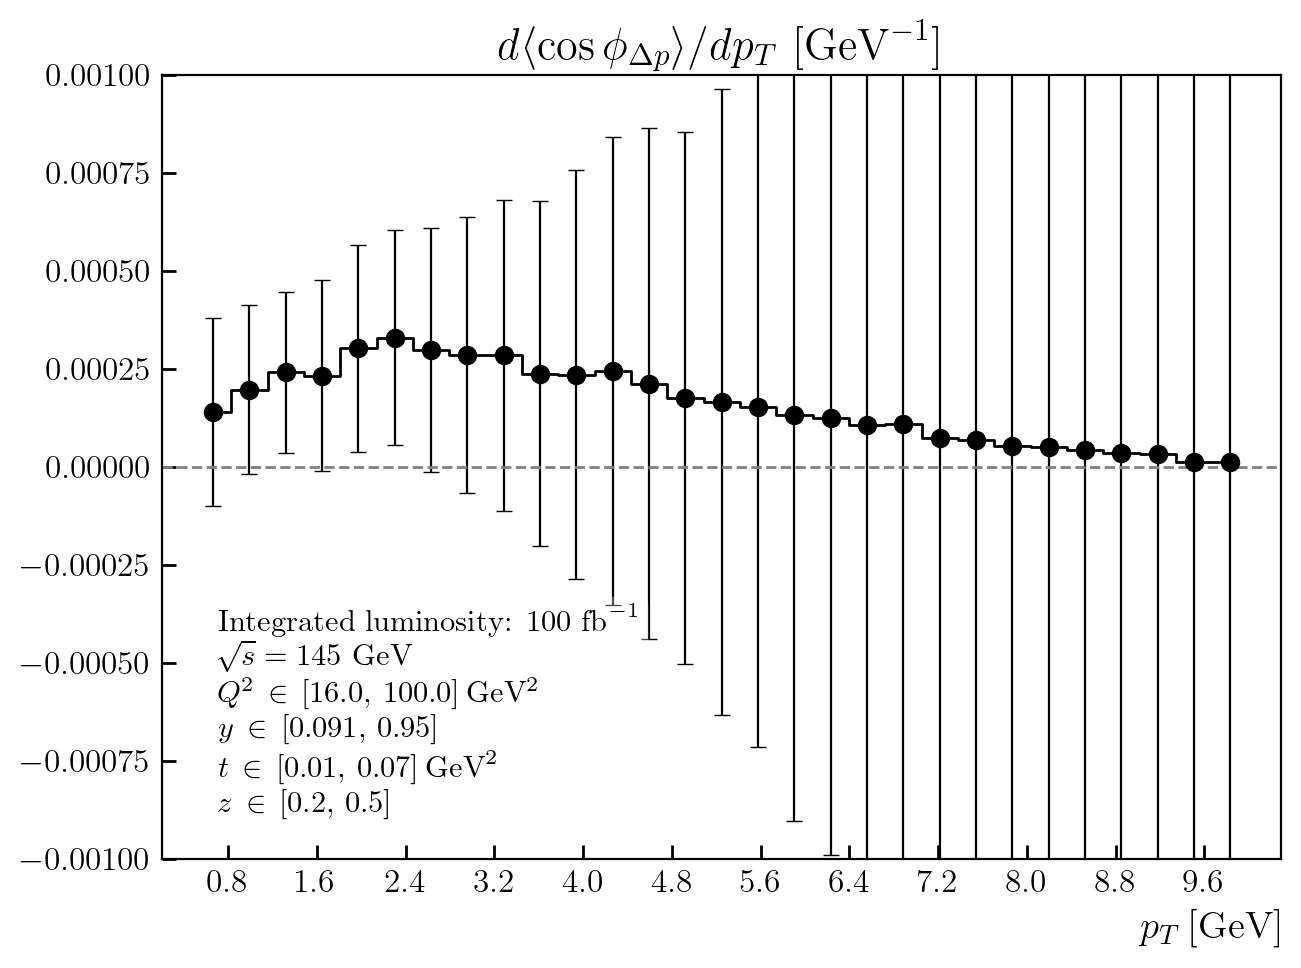

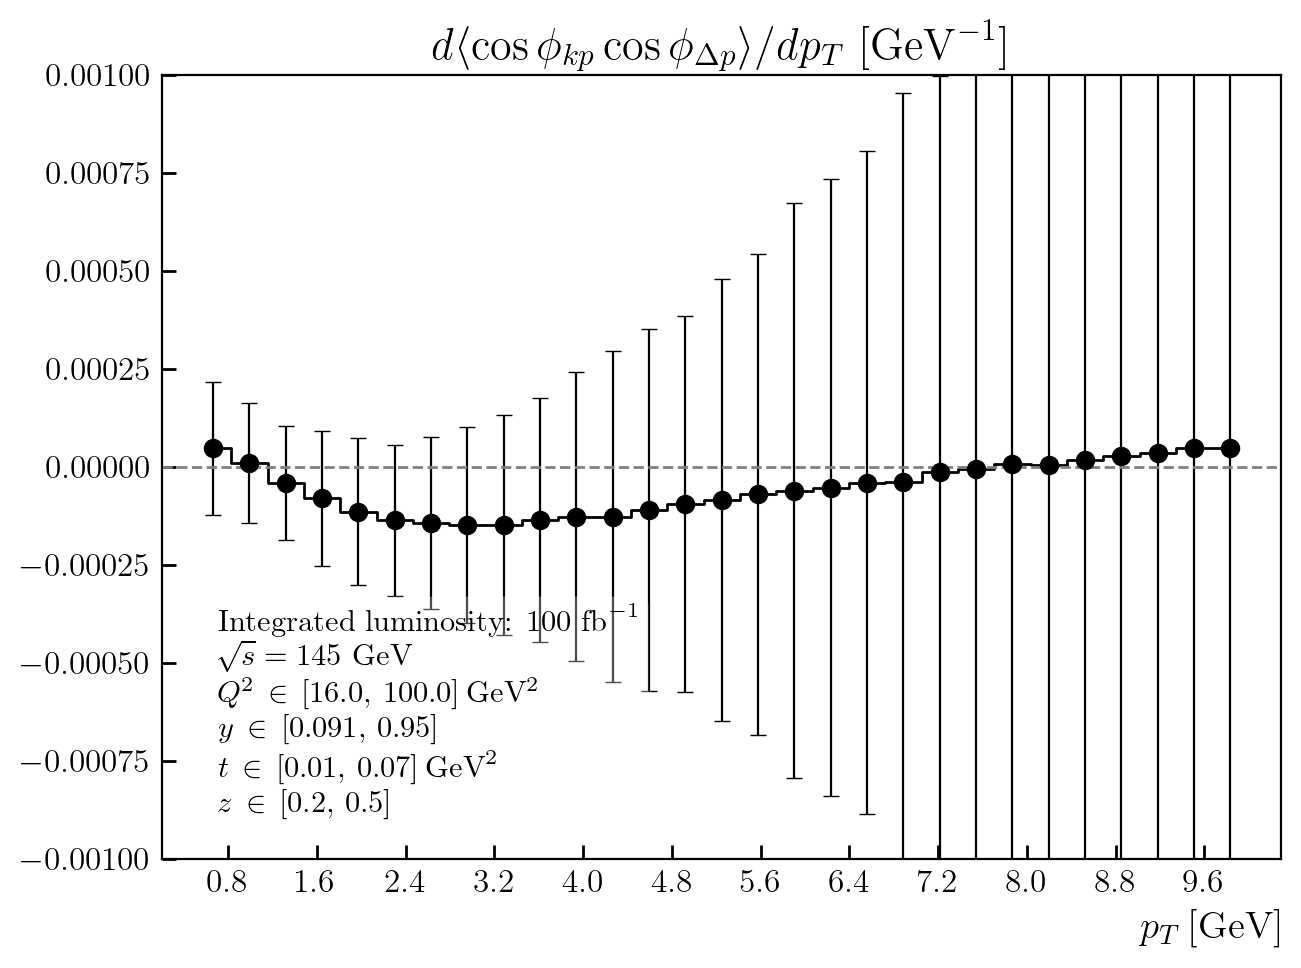

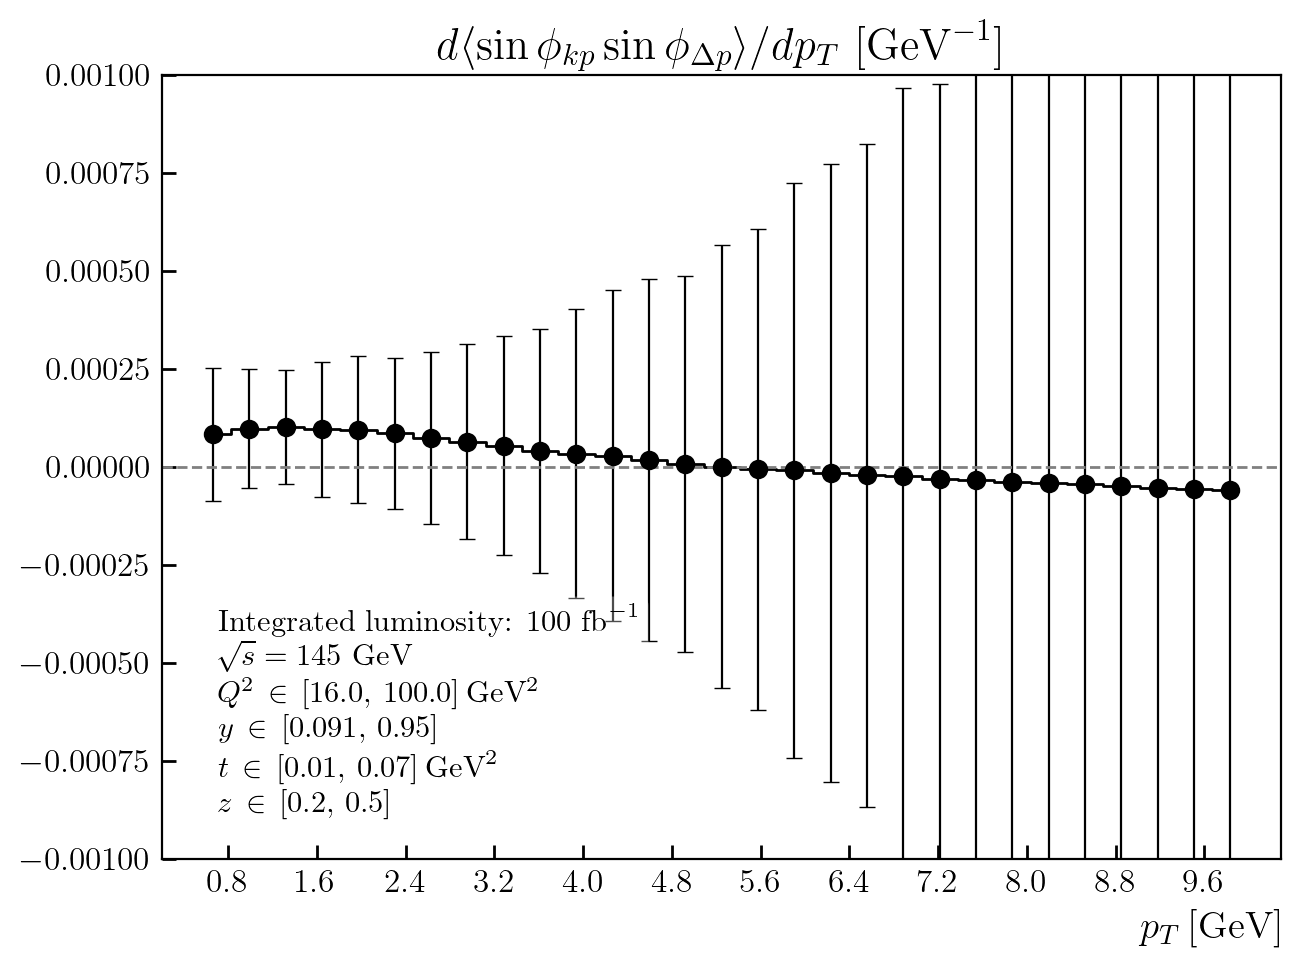

In [482]:
# plot relevant quantities 

Q_bins = np.linspace(6, 10.0, num=35)
pT_bins = np.linspace(0.5, 10.0, num=30)
# pT_bins = np.linspace(0, 9.0, num=70)
phi_bins = [i/(2*np.pi) for i in range(15)]

lumi = 100
Q_min = 4.0
Q_max = 10.5
y_min = 0.4
y_max = 0.5
z_min = 0.2
z_max = 0.5
x_min = 0.00001
x_max = 0.01
t_min = 0.01
t_max = 0.04

cuts = {
        # 'Q': [Q_min, Q_max],
        # 'pT': [2.5, 3.5]
        # 'y': [y_min, y_max],
        'z': [z_min, z_max],
        # 'x': [x_min, x_max],
        # 't': [t_min, t_max]
        }

cdata = []
labels = ['test']
for df in mc_dfs:
    tdata, cdf = cut_data(df, 'pT', cuts, bins=pT_bins, lumi=lumi)
    cdata.append(tdata)
    # cut_data(df.head(10000), 'pT', cuts, bins=pT_bins, lumi=lumi)

tag = 'DNS'
labels = [r'$\sqrt{s} = 55 \, \mathrm{GeV}$', r'$\sqrt{s} = 95 \, \mathrm{GeV}$', r'$\sqrt{s} = 135 \, \mathrm{GeV}$']

# ['cos(phi_Dp)', 'cos(phi_Dp)cos(phi_kp)', 'sin(phi_Dp)sin(phi_kp)']
plot_histogram(cdata, cdf, ['cos(phi_Dp)'],
               labels = labels,
               efficiency = 1, 
               # y_scale='log', 
               # x_scale='log',
               # x_limits = [5, 11], 
               bins = pT_bins,
               y_limits = [-0.001, 0.001],
               # one_line = True,
               zero_line = True,
               # plot_ratio=False,
                # rel_error=True,
               info_box = True,
               roots_label=True,
               title=r'$d \langle  \cos \phi_{\Delta p} \rangle /dp_T \,\,[\mathrm{GeV}^{-1}]$', 
               # title=r'$\delta_{\mathrm{rel.}}  \langle  \cos \phi_{\Delta p}  \rangle $',
               x_label=r'$p_T\, [\mathrm{GeV}]$',
               saveas = f'plots/cos_{tag}.pdf'
              )


plot_histogram(cdata, cdf, ['cos(phi_Dp)cos(phi_kp)'],
               labels = labels,
               efficiency = 1, 
               # y_scale='log', 
               # x_scale='log',
               # x_limits = [5, 11], 
               bins = pT_bins,
               y_limits = [-0.001, 0.001],
               # one_line = True,
               zero_line = True,
               # plot_ratio=False,
                # rel_error=True,
               info_box = True,
               roots_label=True,
               title=r'$d \langle  \cos \phi_{k p} \cos \phi_{\Delta p} \rangle /dp_T \,\,[\mathrm{GeV}^{-1}]$', 
               # title=r'$\delta_{\mathrm{rel.}}  \langle  \cos \phi_{\Delta p}  \rangle $',
               x_label=r'$p_T\, [\mathrm{GeV}]$',
               saveas = f'plots/coscos_{tag}.pdf'
              )


plot_histogram(cdata, cdf, ['sin(phi_Dp)sin(phi_kp)'],
               labels = labels,
               efficiency = 1, 
               # y_scale='log', 
               # x_scale='log',
               # x_limits = [5, 11], 
               bins = pT_bins,
               y_limits = [-0.001, 0.001],
               # one_line = True,
               zero_line = True,
               # plot_ratio=False,
                # rel_error=True,
               info_box = True,
               roots_label=True,
               title=r'$d \langle  \sin \phi_{k p} \sin \phi_{\Delta p} \rangle /dp_T \,\,[\mathrm{GeV}^{-1}]$', 
               # title=r'$\delta_{\mathrm{rel.}}  \langle  \cos \phi_{\Delta p}  \rangle $',
               x_label=r'$p_T\, [\mathrm{GeV}]$',
               saveas = f'plots/sinsin_{tag}.pdf'
              )


